## 1. Loading and Preparing data

In [285]:
#Libraries used

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
#Evaluation
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
#Hyperparameter tunning
from sklearn.model_selection import RandomizedSearchCV

In [243]:
df = pd.read_csv("DataSetCustomer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [245]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### Analysis
As can be seen in the data information. We have noticed that many data types are not correct. For example, "TotalCharges" should be float instead of object. Also, TotalCharges has empty spaces, so we need to replace by "median" value.

In [246]:
Columns = ['gender', "SeniorCitizen", "Partner", "Dependents", "tenure", "PhoneService",
          "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection",
          "TechSupport", "StreamingTV", "StreamingMovies", "Contract", "PaperlessBilling", "PaymentMethod", "MonthlyCharges", "TotalCharges"]

In [247]:
df.query('TotalCharges == " "')
#There is 11 rows are empty values

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [248]:
# Replace empty values by median
np.median(df.query('TotalCharges != " "')['TotalCharges'].astype('float'))
# Replace empty values by median
df['TotalCharges']=df['TotalCharges'].replace(" ","1397.475")
#Convert TotalCharges to float
df['TotalCharges']=df['TotalCharges'].astype('float')

In [249]:
#Drop unnesseccary column
df.drop('customerID',axis='columns',inplace=True)

In [250]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 2. EDA

In [251]:
df["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

##### Analysis:
Next, we will explore the unnique value in each column to detect if there is any value we migh have to change.

In [252]:
for i in Columns:
    unique = df[i].unique()
    print(f'{i} : {unique}')

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2

##### Analysis:
The value such as "No internet service" or "No phone service" needs to be replaced by "No", because they give the same value as no. So that they will remain only "yes" and "No" vlaues.

In [253]:
df.replace("No internet service", "No", inplace= True)
df.replace("No phone service", "No", inplace= True)

In [254]:
for i in Columns:
    unique = df[i].unique()
    print(f'{i} : {unique}') 

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]


In [255]:
CategoricalCol = ['gender', "SeniorCitizen", "Partner", "Dependents", "PhoneService",
          "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection",
          "TechSupport", "StreamingTV", "StreamingMovies", "Contract", "PaperlessBilling", "PaymentMethod"]

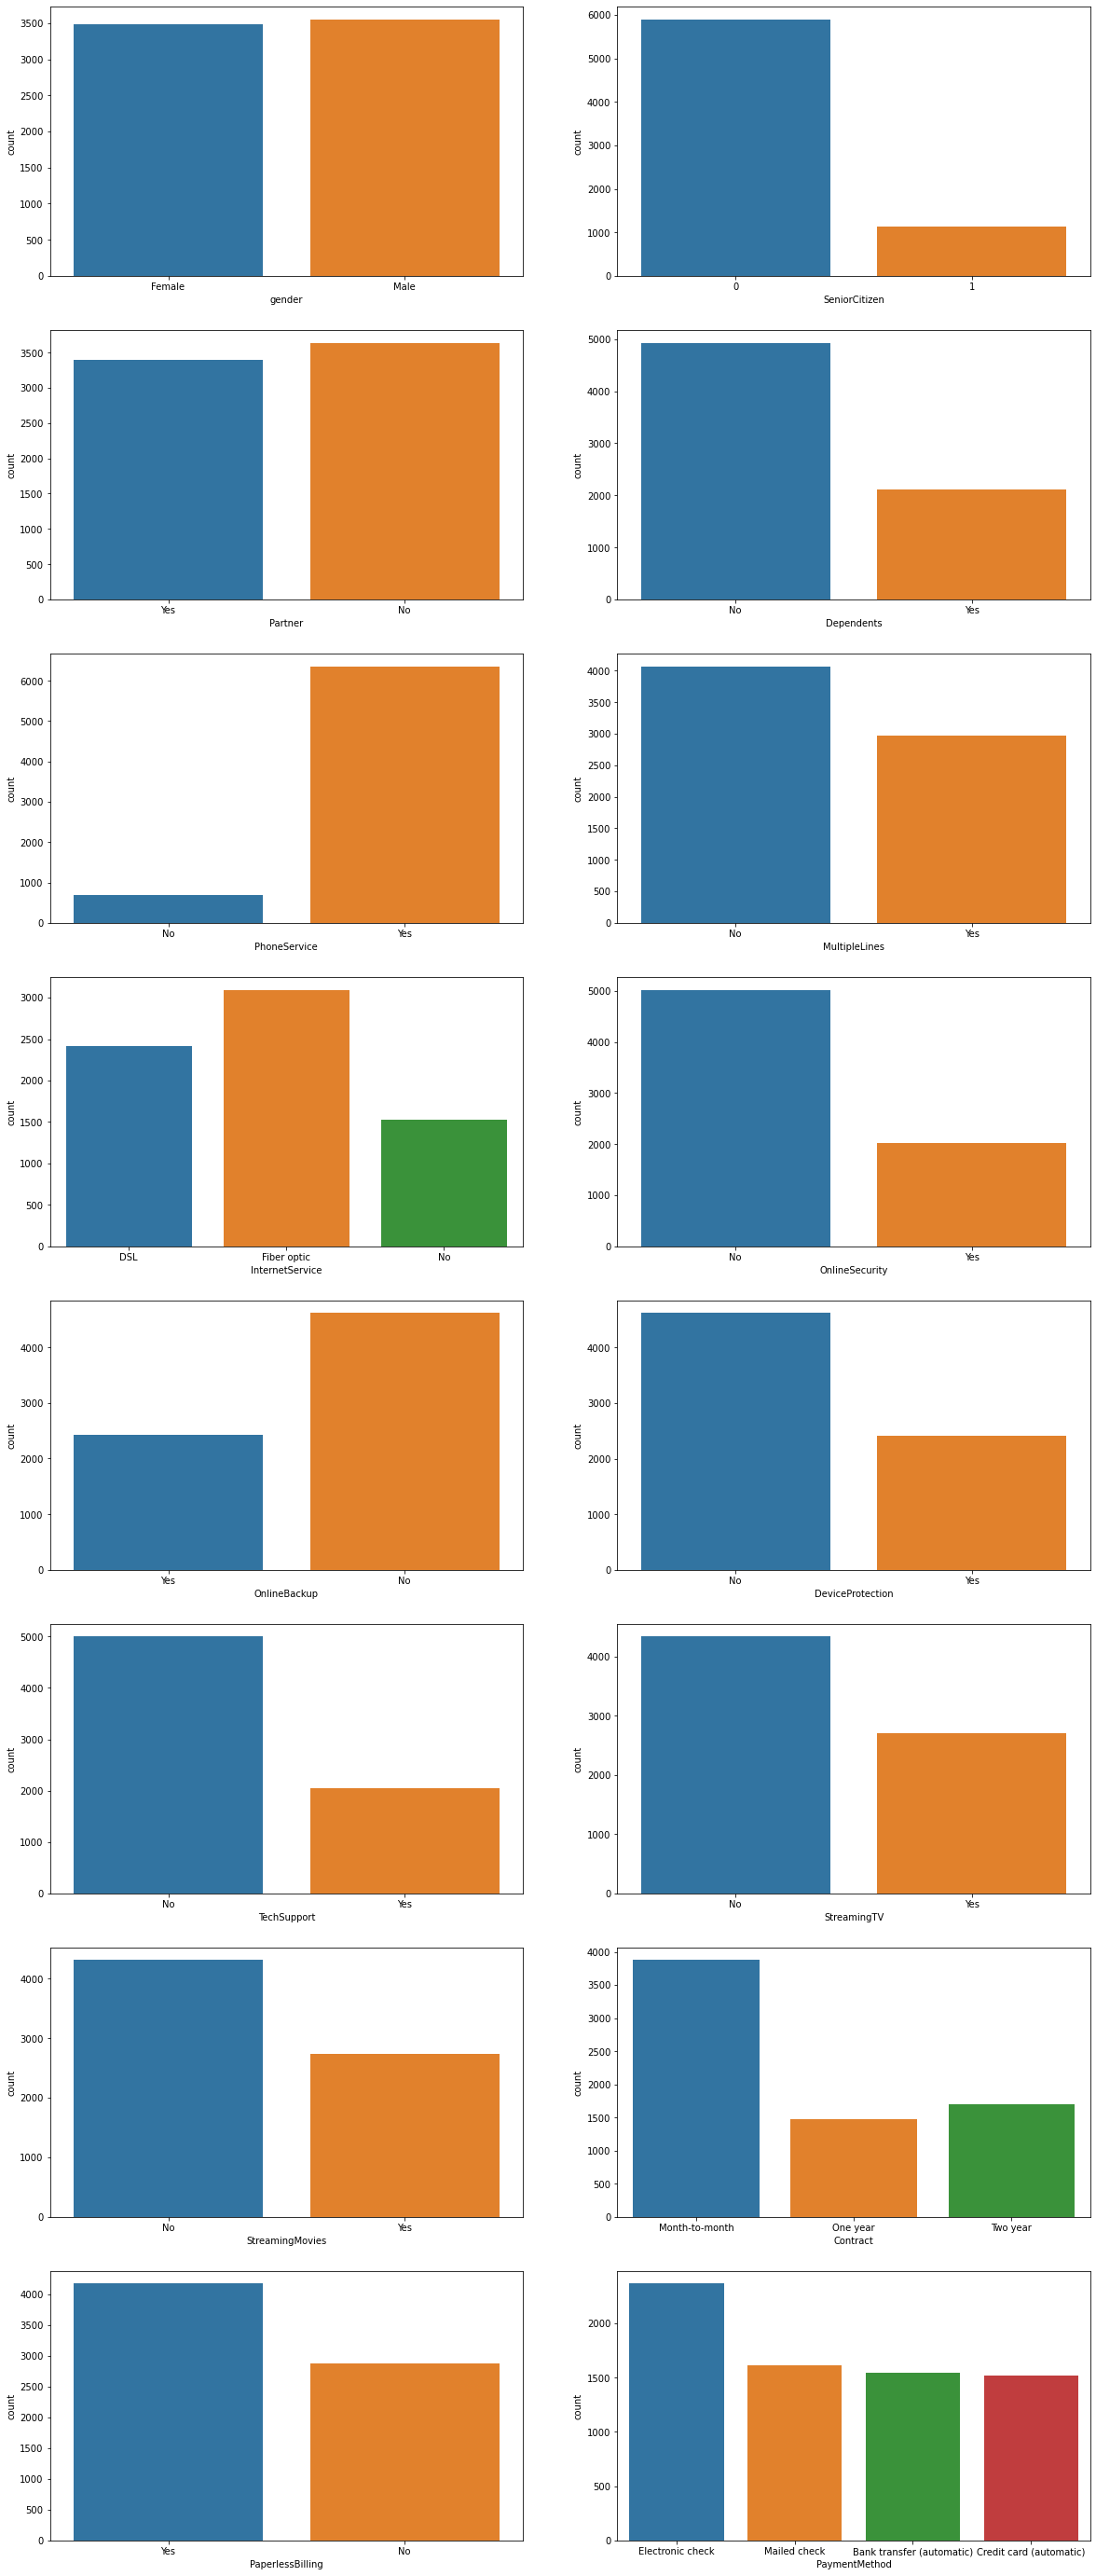

In [256]:
#Categorical Exploration
fig, ax = plt.subplots(8,2, figsize= (20,50))
# fig.suptitle("The Churn count by each factors")

for i, col in enumerate(CategoricalCol):
    ax = plt.subplot(8, 2, i+1)
    sns.countplot(data=df, x=col, ax=ax)

## The proportion of Churn by each factors

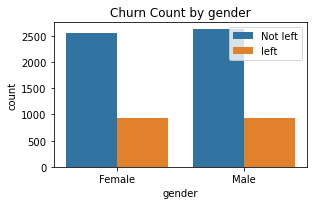

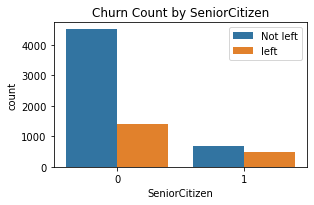

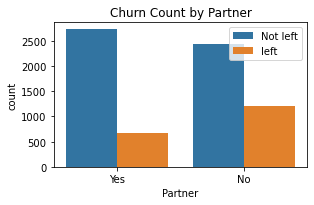

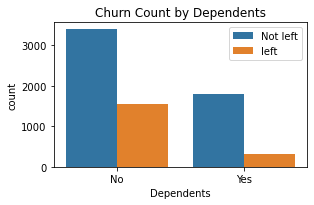

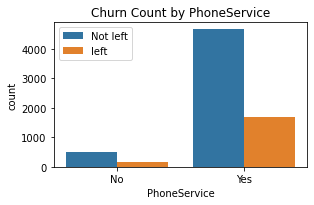

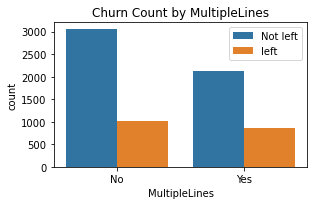

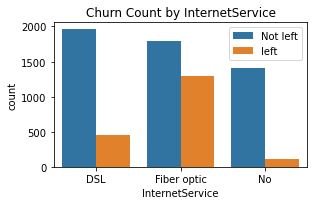

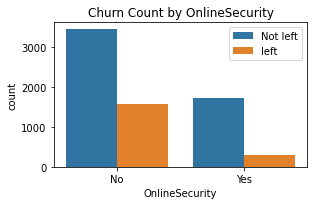

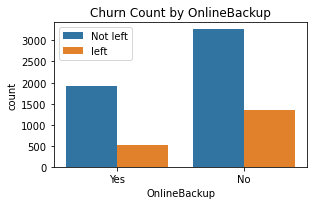

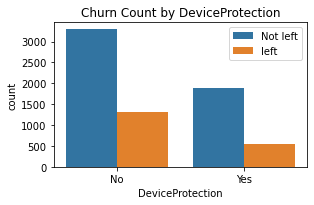

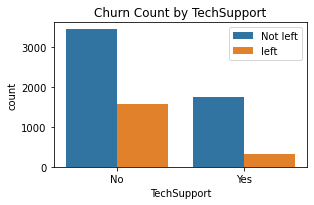

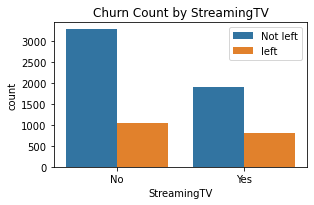

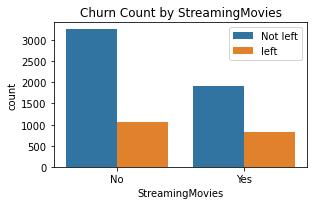

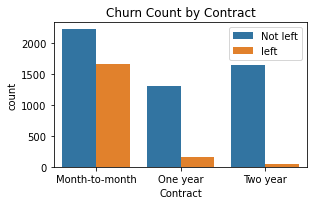

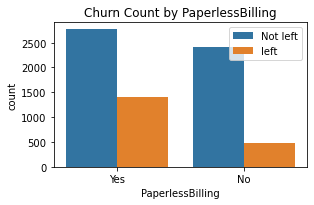

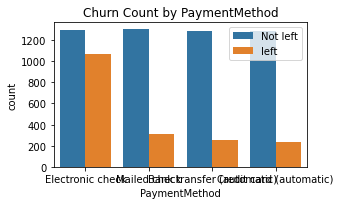

In [257]:
for i, col in enumerate(CategoricalCol):
    plt.figure(figsize=(10, 25))
    ax = plt.subplot(8, 2, i+1)
    sns.countplot(data=df, x= col, hue = 'Churn', ax=ax)
    plt.legend(['Not left','left'])
    plt.title(f"Churn Count by {col}")
    plt.show()

###### Analisis:
1. gender: The male who has stayed in the program has a slightly higher amount than the female.
2. The Customer who is not a senior person tend to not leave the program.
3. Customers who have family or partners are more loyal to the program.
4. The customer who is independent tends not to leave the program.
5. Customers who use the Phone service have a huge chance of leaving the program.
6. The customer who has multiple lines tends not to leave the program.
7. Customers who use DSL internet service have a better chance of not leaving than those who don’t connect to any internet services.
8. Customers who use online security services have a lower churn rate than those who don't.
9. Customers who hold TechSupport, StreamingTV and StreamingMovies have a lower chance of leaving the program.
10. The proportion of customers who have a two-year contract has the highest churn rate.
11. Customers who chose electronic method have the same chance of leaving or not leaving

### Distribuution by numerical data

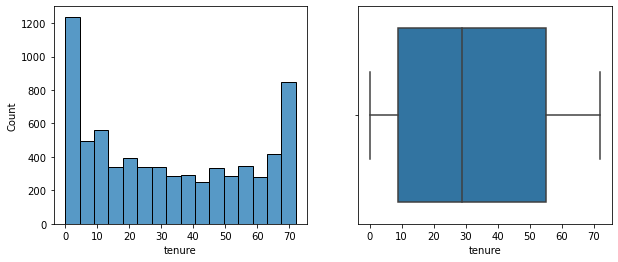

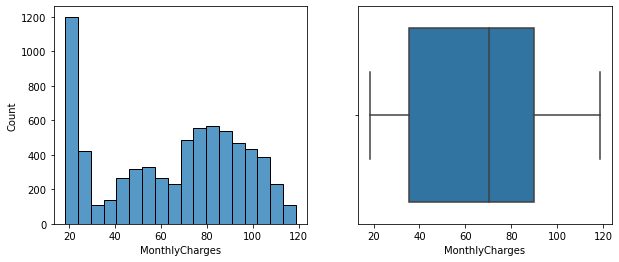

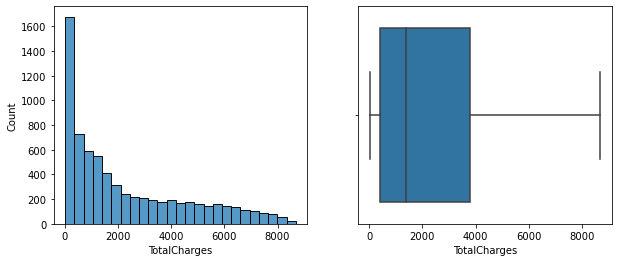

In [258]:
numerical = ['tenure', 'MonthlyCharges', 'TotalCharges']
for col in numerical:
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    sns.histplot(data=df, x=col, ax=ax[0])
    sns.boxplot(data=df, x=col, ax=ax[1])

In [259]:
bins = [0,5, 10, 15, 20, 25,30,35,40,50, 55, 60, 65, 70, 80]
labels = ['5', '10', '15', '20', '25','30','35','40','50', '55', '60', '65', '70', '80']
df['Tenure_bins'] = pd.cut(df['tenure'], bins=bins, labels=labels)


bins = [18, 28, 38, 48, 58,68,78,88,98]
labels = ['28', '38', '48', '58','68','78','88','98']
df['MonthlyCharges_bins'] = pd.cut(df['MonthlyCharges'], bins=bins, labels=labels)

bins = [-10, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000]
labels = ['1000', '2000', '3000', '4000', '5000','6000','7000','8000','9000']
df['TotalCharges_bins'] = pd.cut(df['TotalCharges'], bins=bins, labels=labels)

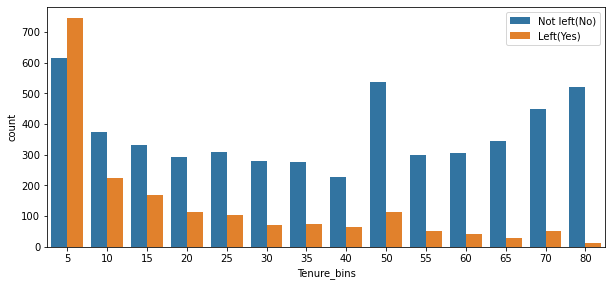

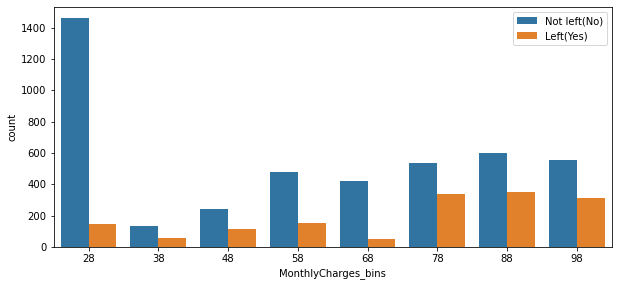

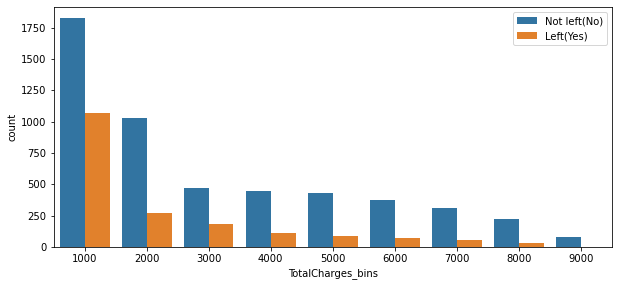

In [260]:

numBins = ['Tenure_bins', 'MonthlyCharges_bins', 'TotalCharges_bins']

for i, col in enumerate(numBins):
    plt.figure(figsize=(10, 15))
    plt.subplot(3,1,i+1)
    sns.countplot(data=df, x= col, hue = 'Churn')
    plt.legend(['Not left(No)','Left(Yes)'])
    

###### Analysis:
1. Customers who join the service for less than five years have the highest churn, compared to those who have been using the service for more than five years.
2. All age ranges have been using the service, especially those aged 18–28 years old.
3. The total charge has no effect on the customer's decision to leave the program.

## 3. Feature engineering

#### Label Encoder transformation

In [261]:
EncoderLabel = ['Partner', 'Dependents', 'PhoneService', 
                'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
                'DeviceProtection', 'TechSupport', 'StreamingTV',
                'StreamingMovies', 'PaperlessBilling']

for i in EncoderLabel:
    df[i].replace({'Yes': 1, "No" : 0}, inplace = True)

In [262]:
for i in Columns:
    unique = df[i].unique()
    print(f'{i} : {unique}')

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]


#### One Hot Encoding

In [263]:
# Gendar Columns
df['gender'].replace({'Female': 1, "Male" : 0}, inplace = True)

In [264]:
Dummie = ["InternetService", "Contract", 'PaymentMethod']

df = pd.get_dummies(df, columns = Dummie, drop_first= True)



In [265]:
df = df.drop(["Tenure_bins", "MonthlyCharges_bins", "TotalCharges_bins"],axis=1 )
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,29.85,29.85,No,0,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,56.95,1889.50,No,0,0,1,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,53.85,108.15,Yes,0,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,42.30,1840.75,No,0,0,1,0,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,70.70,151.65,Yes,1,0,0,0,0,1,0


#### Min Max scaler for Tenure, Monthly Charge, Total Charge

In [266]:
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

df.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.013889,0,0,0,1,0,...,0.115423,0.001275,No,0,0,0,0,0,1,0
1,0,0,0,0,0.472222,1,0,1,0,1,...,0.385075,0.215867,No,0,0,1,0,0,0,1
2,0,0,0,0,0.027778,1,0,1,1,0,...,0.354229,0.010310,Yes,0,0,0,0,0,0,1
3,0,0,0,0,0.625000,0,0,1,0,1,...,0.239303,0.210241,No,0,0,1,0,0,0,0
4,1,0,0,0,0.027778,1,0,0,0,0,...,0.521891,0.015330,Yes,1,0,0,0,0,1,0


## 4.Model Selection

#### Split data

In [268]:
X = df.drop(['Churn'], axis = 1)
y = df['Churn']
#Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

In [271]:
X_train.shape

(5634, 23)

In [272]:
print("shape of X_train :", X_train.shape)
print("shape of X_test :", X_test.shape)    
print("shape of y_train :",y_train.shape)
print("shape of y_test :", y_test.shape)  

shape of X_train : (5634, 23)
shape of X_test : (1409, 23)
shape of y_train : (5634,)
shape of y_test : (1409,)


#### Model1: LogisticRegression

classification accuracy 0.8168914123491838


              precision    recall  f1-score   support

          No       0.86      0.90      0.88      1057
         Yes       0.65      0.57      0.61       352

    accuracy                           0.82      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.81      0.82      0.81      1409





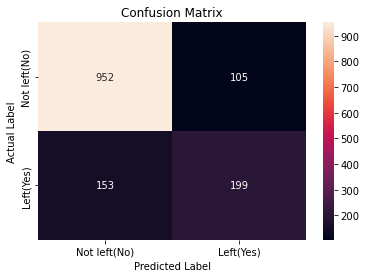

In [273]:
LogReg = LogisticRegression(random_state = 24, max_iter=1e4)

#step2: Selecting appropriate model parameters // predict model
LogReg_trained = LogReg.fit(X_train, y_train)
y_pred_test = LogReg_trained.predict(X_test)

 #step3: Evaluating the performances

#classification accuracy
acc = accuracy_score(y_test, y_pred_test)
print("classification accuracy", acc)
print("\n")
        #Precision // recall // F1-score
print(classification_report(y_test, y_pred_test ))
    
#plot confusion matrix
#confusion matrix
conf = confusion_matrix(y_test, y_pred_test)
print("\n")
class_label = ["Not left(No)", "Left(Yes)"]
df_conf = pd.DataFrame(conf, index = class_label, columns = class_label)
sns.heatmap(df_conf, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

#### Model2: Decision tree

classification accuracy 0.7395315826827538


              precision    recall  f1-score   support

          No       0.83      0.82      0.82      1057
         Yes       0.48      0.50      0.49       352

    accuracy                           0.74      1409
   macro avg       0.66      0.66      0.66      1409
weighted avg       0.74      0.74      0.74      1409





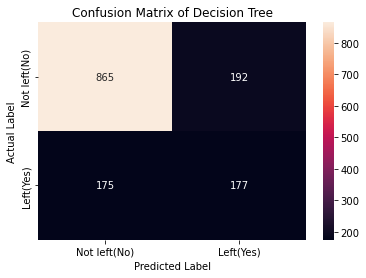

In [274]:
dtc = DecisionTreeClassifier(random_state = 24)

#step2: Selecting appropriate model parameters // predict model
dtc_trained = dtc.fit(X_train, y_train)
y_pred_test = dtc_trained.predict(X_test)

#step3: Evaluating the performances

#classification accuracy
acc = accuracy_score(y_test, y_pred_test)
print("classification accuracy", acc)
print("\n")
        #Precision // recall // F1-score
print(classification_report(y_test, y_pred_test ))
    
#plot confusion matrix
#confusion matrix
conf = confusion_matrix(y_test, y_pred_test)
print("\n")
class_label = ["Not left(No)", "Left(Yes)"]
df_conf = pd.DataFrame(conf, index = class_label, columns = class_label)
sns.heatmap(df_conf, annot = True, fmt = "d")
plt.title("Confusion Matrix of Decision Tree")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

#### Model3: Random Forest

classification accuracy 0.8211497515968772


              precision    recall  f1-score   support

          No       0.85      0.92      0.89      1057
         Yes       0.69      0.53      0.59       352

    accuracy                           0.82      1409
   macro avg       0.77      0.72      0.74      1409
weighted avg       0.81      0.82      0.81      1409





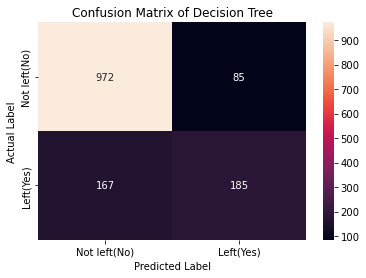

In [275]:
Rdf = RandomForestClassifier(max_depth=10, random_state=0)

#step2: Selecting appropriate model parameters // predict model
Rdf_trained = Rdf .fit(X_train, y_train)
y_pred_test = Rdf_trained.predict(X_test)

#step3: Evaluating the performances

#classification accuracy
acc = accuracy_score(y_test, y_pred_test)
print("classification accuracy", acc)
print("\n")
        #Precision // recall // F1-score
print(classification_report(y_test, y_pred_test ))
    
#plot confusion matrix
#confusion matrix
conf = confusion_matrix(y_test, y_pred_test)
print("\n")
class_label = ["Not left(No)", "Left(Yes)"]
df_conf = pd.DataFrame(conf, index = class_label, columns = class_label)
sns.heatmap(df_conf, annot = True, fmt = "d")
plt.title("Confusion Matrix of Decision Tree")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

## 5. Find for the best model & Tuning(Random Forest)

In [276]:
from scipy.stats import randint
model_params = {
    # randomly sample numbers from 4 to 500 estimators
    'n_estimators': randint(4,500),
    'max_depth': randint(3,5),
    # normally distributed max_features, with mean .25 stddev 0.1, bounded between 0 and 1
    'max_features': truncnorm(a=0, b=1, loc=0.25, scale=0.1),
    # uniform distribution from 0.01 to 0.2 (0.01 + 0.199)
    'min_samples_split': uniform(0.01, 0.3)
}
clf = RandomizedSearchCV(RandomForestClassifier(), model_params, random_state=0,n_iter=10,n_jobs=-1)
clf.fit(X_train,y_train)

print("Best parameters:", clf.best_params_)
print("Best score:", clf.best_score_)

Best parameters: {'max_depth': 4, 'max_features': 0.3202927255398827, 'min_samples_split': 0.04177228215633764, 'n_estimators': 155}
Best score: 0.7925086012472793


In [277]:
#Train and predict the tunned model
lr = RandomForestClassifier(**clf.best_params_ )
lr_trained = lr.fit(X_train, y_train)
y_pred = lr_trained.predict(X_train)

classification accuracy 0.7925097621583245
              precision    recall  f1-score   support

          No       0.81      0.93      0.87      4117
         Yes       0.69      0.41      0.52      1517

    accuracy                           0.79      5634
   macro avg       0.75      0.67      0.69      5634
weighted avg       0.78      0.79      0.77      5634



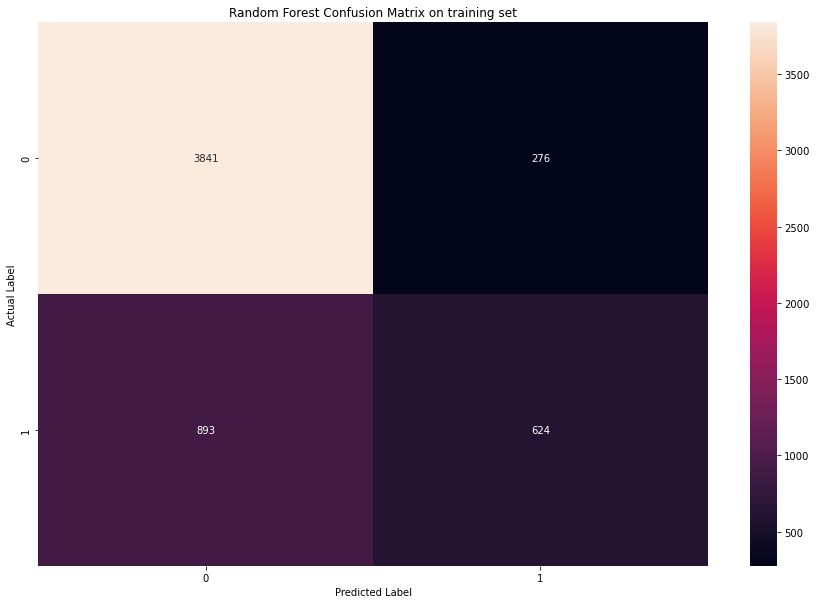

In [278]:
#Confusion matrix
#classification accuracy
acc = accuracy_score(y_train, y_pred)
print("classification accuracy", acc)
print(classification_report(y_train, y_pred))

conf = confusion_matrix(y_train, y_pred)
plt.figure(figsize=(15,10))
sns.heatmap(conf, annot = True, fmt = 'd')
class_label = ["Not left(No)", "Left(Yes)"]
df_conf = pd.DataFrame(conf, index = class_label, columns = class_label)
plt.title("Random Forest Confusion Matrix on training set")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

## 6.Performance on Test set

classification accuracy 0.8048261178140526
              precision    recall  f1-score   support

          No       0.83      0.93      0.88      1057
         Yes       0.67      0.43      0.53       352

    accuracy                           0.80      1409
   macro avg       0.75      0.68      0.70      1409
weighted avg       0.79      0.80      0.79      1409



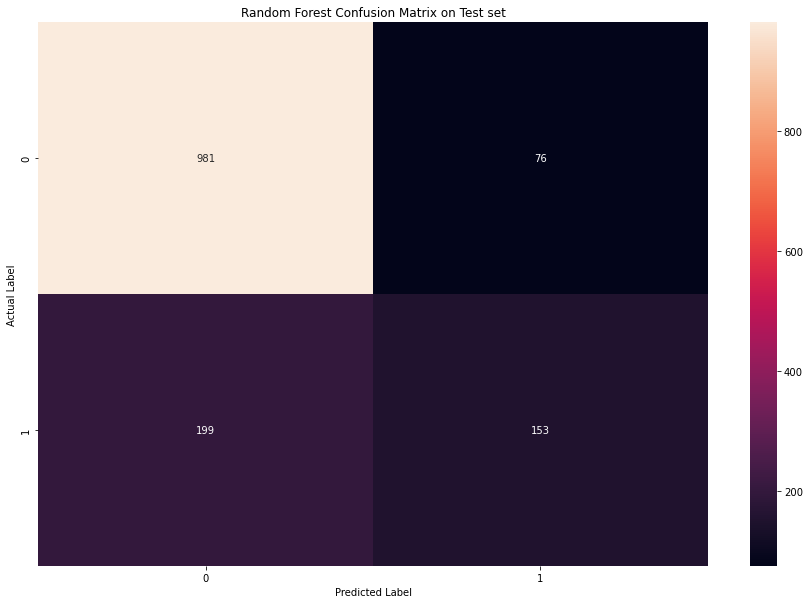

In [296]:
lr = RandomForestClassifier(**clf.best_params_ )
lr_trained = lr.fit(X_train, y_train)
y_pred = lr_trained.predict(X_test)
#classification accuracy
acc = accuracy_score(y_test, y_pred)
print("classification accuracy", acc)

print(classification_report(y_test, y_pred))

conf = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(15,10))
sns.heatmap(conf, annot = True, fmt = 'd')
class_label = ["Not left(No)", "Left(Yes)"]
df_conf = pd.DataFrame(conf, index = class_label, columns = class_label)
plt.title("Random Forest Confusion Matrix on Test set")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()